In [4]:
# Import necessary libraries
import pandas as pd

def calculate_average_places(game_logs):
    # Filter to the last round of each game (assuming max(round_id) is the end state)
    last_rounds = game_logs.loc[game_logs.groupby('game_id')['round_id'].idxmax()]

    # Extract player coin columns
    player_columns = [col for col in last_rounds.columns if col.startswith('player_') and col.endswith('_coins')]
    
    # Prepare a dataframe to store player places
    places = []

    for _, row in last_rounds.iterrows():
        # Get coins for all players
        coins = {player: row[player] for player in player_columns}
        # Rank players (higher coins -> better rank)
        ranked_players = sorted(coins.items(), key=lambda x: x[1], reverse=True)
        # Store ranks
        for rank, (player, _) in enumerate(ranked_players, start=1):
            places.append({'game_id': row['game_id'], 'player': player, 'place': rank})

    # Convert to DataFrame
    places_df = pd.DataFrame(places)

    # Calculate average place for each player
    avg_places = places_df.groupby('player')['place'].mean().reset_index()
    avg_places.rename(columns={'place': 'average_place'}, inplace=True)
    
    avg_places['player'] = ['MTCS Agent', 'Only Rolling Agent', 'Greedy Agent', 'Only Round Betting']
    
    return avg_places

# Load the game logs from a CSV file
file_path = "../data/100_MCTS_games.csv"  # Replace with your file path
game_logs = pd.read_csv(file_path)

# Compute the average places
average_places = calculate_average_places(game_logs)

print(average_places)


               player  average_place
0          MTCS Agent           3.99
1  Only Rolling Agent           2.58
2        Greedy Agent           1.03
3  Only Round Betting           2.40


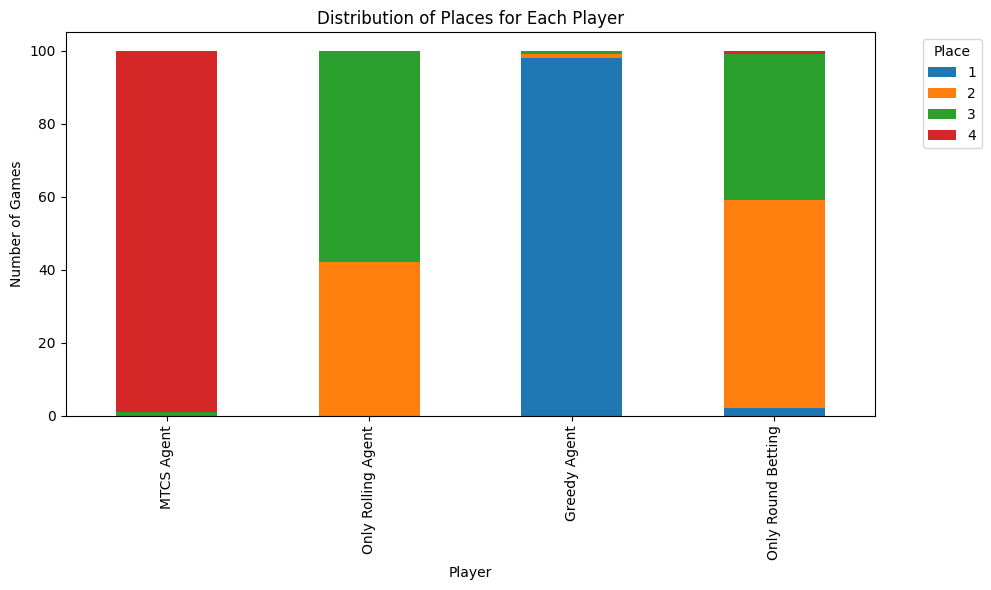

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_places_distribution(game_logs):
    # Filter to the last round of each game (assuming max(round_id) is the end state)
    last_rounds = game_logs.loc[game_logs.groupby('game_id')['round_id'].idxmax()]

    # Extract player coin columns
    player_columns = [col for col in last_rounds.columns if col.startswith('player_') and col.endswith('_coins')]
    
    # Prepare a dataframe to store player places
    places = []

    for _, row in last_rounds.iterrows():
        # Get coins for all players
        coins = {player: row[player] for player in player_columns}
        # Rank players (higher coins -> better rank)
        ranked_players = sorted(coins.items(), key=lambda x: x[1], reverse=True)
        # Store ranks
        for rank, (player, _) in enumerate(ranked_players, start=1):
            places.append({'game_id': row['game_id'], 'player': player, 'place': rank})
    
    # Convert to DataFrame
    places_df = pd.DataFrame(places)
    
    return places_df

def plot_player_places_distribution(places_df):
    """
    Plots a bar graph of the distribution of places for each player.
    :param places_df: DataFrame containing game_id, player, and place columns.
    """
    # Count the occurrences of each place per player
    distribution = places_df.groupby(['player', 'place']).size().unstack(fill_value=0)
    
    player_labels = ['MTCS Agent', 'Only Rolling Agent', 'Greedy Agent', 'Only Round Betting']
    distribution.index = player_labels
    
    # Plot the bar graph
    distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Distribution of Places for Each Player')
    plt.xlabel('Player')
    plt.ylabel('Number of Games')
    plt.legend(title='Place', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Load the game logs from a CSV file
file_path = "../data/100_MCTS_games.csv"   # Replace with your file path
game_logs = pd.read_csv(file_path)

# Calculate places distribution
places_df = calculate_places_distribution(game_logs)

# Plot the distribution of places
plot_player_places_distribution(places_df)


               player  average_coins
0          MTCS Agent           3.24
1  Only Rolling Agent          20.07
2        Greedy Agent          38.55
3  Only Round Betting          21.96


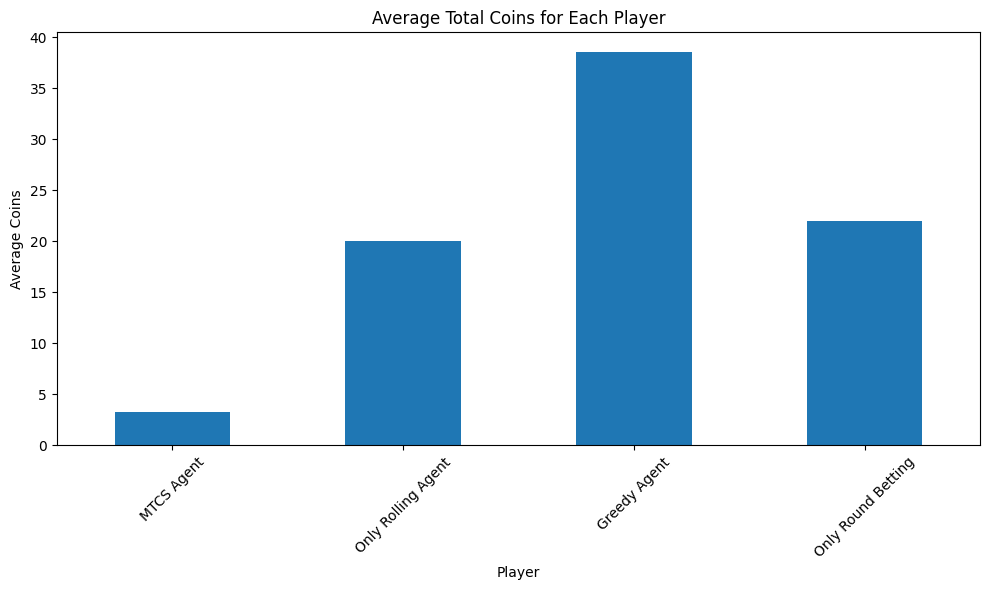

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_average_coins(game_logs):
    """
    Calculates the average total coins for each player across all games.
    :param game_logs: DataFrame containing the game logs.
    :return: DataFrame with average coins for each player.
    """
    # Filter to the last round of each game (assuming max(round_id) is the end state)
    last_rounds = game_logs.loc[game_logs.groupby('game_id')['round_id'].idxmax()]

    # Extract player coin columns
    player_columns = [col for col in last_rounds.columns if col.startswith('player_') and col.endswith('_coins')]
    # player_columns = ['MTCS Agent', 'Only Rolling Agent', 'Greedy Agent', 'Only Round Betting']

    # Calculate the average coins for each player
    avg_coins = last_rounds[player_columns].mean().reset_index()
    avg_coins.columns = ['player', 'average_coins']
    
    avg_coins['player'] = ['MTCS Agent', 'Only Rolling Agent', 'Greedy Agent', 'Only Round Betting']

    return avg_coins

def plot_average_coins(avg_coins_df):
    """
    Plots a bar graph of the average total coins for each player.
    :param avg_coins_df: DataFrame with player and average_coins columns.
    """
    # Plot the bar graph
    avg_coins_df.plot(x='player', y='average_coins', kind='bar', legend=False, figsize=(10, 6))
    plt.title('Average Total Coins for Each Player')
    plt.xlabel('Player')
    plt.ylabel('Average Coins')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Load the game logs from a CSV file
file_path = "../data/100_MCTS_games.csv"   # Replace with your file path
game_logs = pd.read_csv(file_path)

# Calculate average total coins for each player
average_coins = calculate_average_coins(game_logs)

print(average_coins)

# Plot the average total coins
plot_average_coins(average_coins)


In [7]:
# Find the most used action type for each active player
most_used_action = (
    game_logs.groupby(['active_player', 'action_type'])
    .size()
    .reset_index(name='count')
    .sort_values(['active_player', 'count'], ascending=[True, False])
    .groupby('active_player')
    .first()
    .reset_index()
)

# Rename columns for clarity
most_used_action.columns = ['Active Player', 'Most Used Action Type', 'Count']

# Display the result
most_used_action


,Active Player,Most Used Action Type,Count
0,0.0,move_trap,1334
1,1.0,move_camel,1807
2,2.0,round_winner_bet,1085
3,3.0,round_winner_bet,1715
